In [4]:
import os
from tqdm import tqdm

# Specify the main dataset folder path
main_folder = r'C:\sem5\videoimage\project\dataset'

# Function to count the images in each folder with a progress bar
def count_images(folder_path):
    folder_counts = {}
    plant_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    # Add tqdm progress bar to loop
    for folder_name in tqdm(plant_folders, desc="Processing folders"):
        folder_dir = os.path.join(folder_path, folder_name)

        # Count the number of image files in the folder
        image_files = [f for f in os.listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, f))]
        folder_counts[folder_name] = len(image_files)  # Count the number of files in the folder
    
    return folder_counts

# Paths to the train and test folders
train_folder = os.path.join(main_folder, 'train')
test_folder = os.path.join(main_folder, 'test')

# Get the counts for each folder with a progress bar
print("Counting images in Train folder:")
train_counts = count_images(train_folder)

print("\nCounting images in Test folder:")
test_counts = count_images(test_folder)

# Display the results
print("\nTrain folder image counts:")
for plant, count in train_counts.items():
    print(f"{plant}: {count} images")

print("\nTest folder image counts:")
for plant, count in test_counts.items():
    print(f"{plant}: {count} images")


Counting images in Train folder:


Processing folders: 100%|██████████| 41/41 [00:03<00:00, 11.83it/s]



Counting images in Test folder:


Processing folders: 100%|██████████| 41/41 [00:00<00:00, 48.79it/s]


Train folder image counts:
Apple___Apple_scab: 504 images
Apple___Black_rot: 497 images
Apple___Cedar_apple_rust: 220 images
Apple___healthy: 1316 images
Cherry_(including_sour)___healthy: 684 images
Cherry_(including_sour)___Powdery_mildew: 842 images
Chili__healthy: 80 images
Chili__leaf curl: 80 images
Chili__leaf spot: 80 images
Chili__whitefly: 80 images
Chili__yellowish: 80 images
Coffee__healthy: 282 images
Coffee__red spider mite: 136 images
Coffee__Rust: 282 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 411 images
Corn_(maize)___Common_rust_: 954 images
Corn_(maize)___healthy: 930 images
Corn_(maize)___Northern_Leaf_Blight: 788 images
Grape___Black_rot: 944 images
Grape___Esca_(Black_Measles): 1107 images
Grape___healthy: 339 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 861 images
Peach___Bacterial_spot: 1838 images
Peach___healthy: 288 images
Pepper,_bell___Bacterial_spot: 798 images
Pepper,_bell___healthy: 1183 images
Potato___Early_blight: 800 images
Pot

In [26]:
import os
from PIL import Image

# Specify paths
train_dir = r'C:\sem5\videoimage\project\dataset\train'
test_dir = r'C:\sem5\videoimage\project\dataset\test'

def check_dataset_shape(directory):
    image_shapes = []
    total_images = 0

    # Traverse each class folder inside the main directory
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)

        if os.path.isdir(class_dir):
            # Traverse each image in the class folder
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)

                try:
                    with Image.open(image_path) as img:
                        image_shapes.append(img.size)  # Store image dimensions
                        total_images += 1  # Count the total number of images
                except:
                    print(f"Could not load image: {image_path}")

    return image_shapes, total_images

# Check train dataset
train_shapes, total_train_images = check_dataset_shape(train_dir)
print(f"Total Training Images: {total_train_images}")
print(f"Sample Shapes (width, height): {train_shapes[:5]}")  # Print first 5 image shapes

# Check test dataset
test_shapes, total_test_images = check_dataset_shape(test_dir)
print(f"Total Testing Images: {total_test_images}")
print(f"Sample Shapes (width, height): {test_shapes[:5]}")  # Print first 5 image shapes


Total Training Images: 33111
Sample Shapes (width, height): [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Total Testing Images: 8339
Sample Shapes (width, height): [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

ModuleNotFoundError: No module named 'numpy'

In [3]:
# Specify paths
train_dir = r'C:\sem5\videoimage\project\dataset\train'
test_dir = r'C:\sem5\videoimage\project\dataset\test'

In [4]:
# Image Data Generators for train and test data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Load train and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'
)

Found 33111 images belonging to 41 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 8337 images belonging to 41 classes.


In [8]:
# Build CNN model
model = Sequential()

In [9]:
# Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(train_generator.num_classes, activation='softmax'))

c:\sem5\videoimage\project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Callbacks for early stopping and saving the best model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [12]:
# Save the model in `.keras` format (default) or `.h5` by specifying save_format
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [21]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/25
  11/1035 ━━━━━━━━━━━━━━━━━━━━ 18:03 1s/step - accuracy: 0.9229 - loss: 0.2727

KeyboardInterrupt: 

In [13]:
# Load the best model after training (using .keras format)
model = load_model('best_model.keras')

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

c:\sem5\videoimage\project\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 ━━━━━━━━━━━━━━━━━━━━ 118s 451ms/step - accuracy: 0.9249 - loss: 0.2180
Test accuracy: 92.78%


In [20]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [15]:
def predict_image_with_percentage(img_path, model, class_indices):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make the prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    confidence = np.max(prediction) * 100  # Get the highest confidence score (as percentage)
    
    # Map class index back to class name
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_label = class_labels[predicted_class[0]]
    
    # Determine if the predicted class is healthy or diseased
    if "healthy" in predicted_label:
        print(f"The leaf is {confidence:.2f}% healthy.")
    else:
        print(f"The leaf is affected by {predicted_label} and {confidence:.2f}% affected.")


In [16]:
# Print the class labels
print(train_generator.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Chili__healthy': 6, 'Chili__leaf curl': 7, 'Chili__leaf spot': 8, 'Chili__whitefly': 9, 'Chili__yellowish': 10, 'Coffee__Rust': 11, 'Coffee__healthy': 12, 'Coffee__red spider mite': 13, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 14, 'Corn_(maize)___Common_rust_': 15, 'Corn_(maize)___Northern_Leaf_Blight': 16, 'Corn_(maize)___healthy': 17, 'Grape___Black_rot': 18, 'Grape___Esca_(Black_Measles)': 19, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 20, 'Grape___healthy': 21, 'Peach___Bacterial_spot': 22, 'Peach___healthy': 23, 'Pepper,_bell___Bacterial_spot': 24, 'Pepper,_bell___healthy': 25, 'Potato___Early_blight': 26, 'Potato___Late_blight': 27, 'Potato___healthy': 28, 'Strawberry___Leaf_scorch': 29, 'Strawberry___healthy': 30, 'Tomato___Bacterial_spot': 31, 'Tomato___Early_blight': 32, 'T

In [17]:
# Test with a new image
image_path = r'C:\sem5\videoimage\project\leaf(1).jpg'
predict_image_with_percentage(image_path, model, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The leaf is affected by Chili__leaf spot and 95.33% affected.


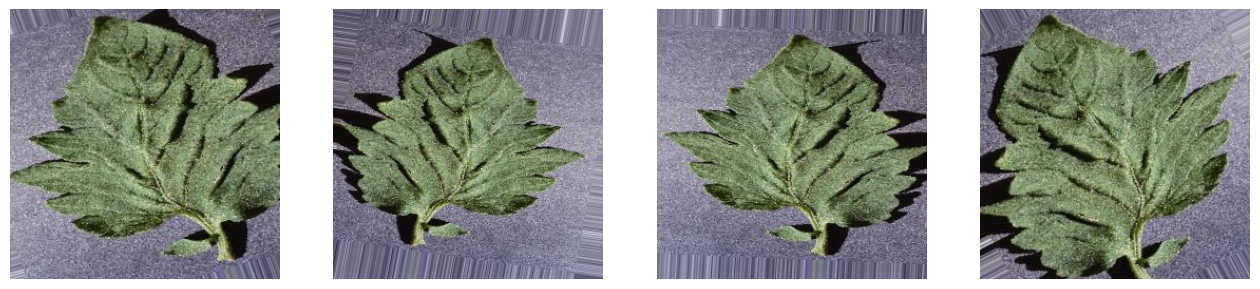

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

# Load the image (ensure you provide the correct path)
image_path = r'C:\sem5\videoimage\project\0d932b2a-584e-4971-8590-70c5f0a049cf___RS_HL 9739.JPG'
img = load_img(image_path)  # Load the image
img_array = img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (required for ImageDataGenerator)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generate a batch of augmented images
augmented_images = datagen.flow(img_array, batch_size=1)


# Generate a few augmented images and plot them
fig, ax = plt.subplots(1, 4, figsize=(16, 16))

# Display 4 augmented images
for i in range(4):
    # Use the built-in next() function instead of augmented_images.next()
    augmented_image = next(augmented_images)[0]  # Get the next augmented image from the generator
  # Get the next augmented image from the generator
    ax[i].imshow(augmented_image)  # Display the image
    ax[i].axis('off')  # Turn off axis labels

plt.show()


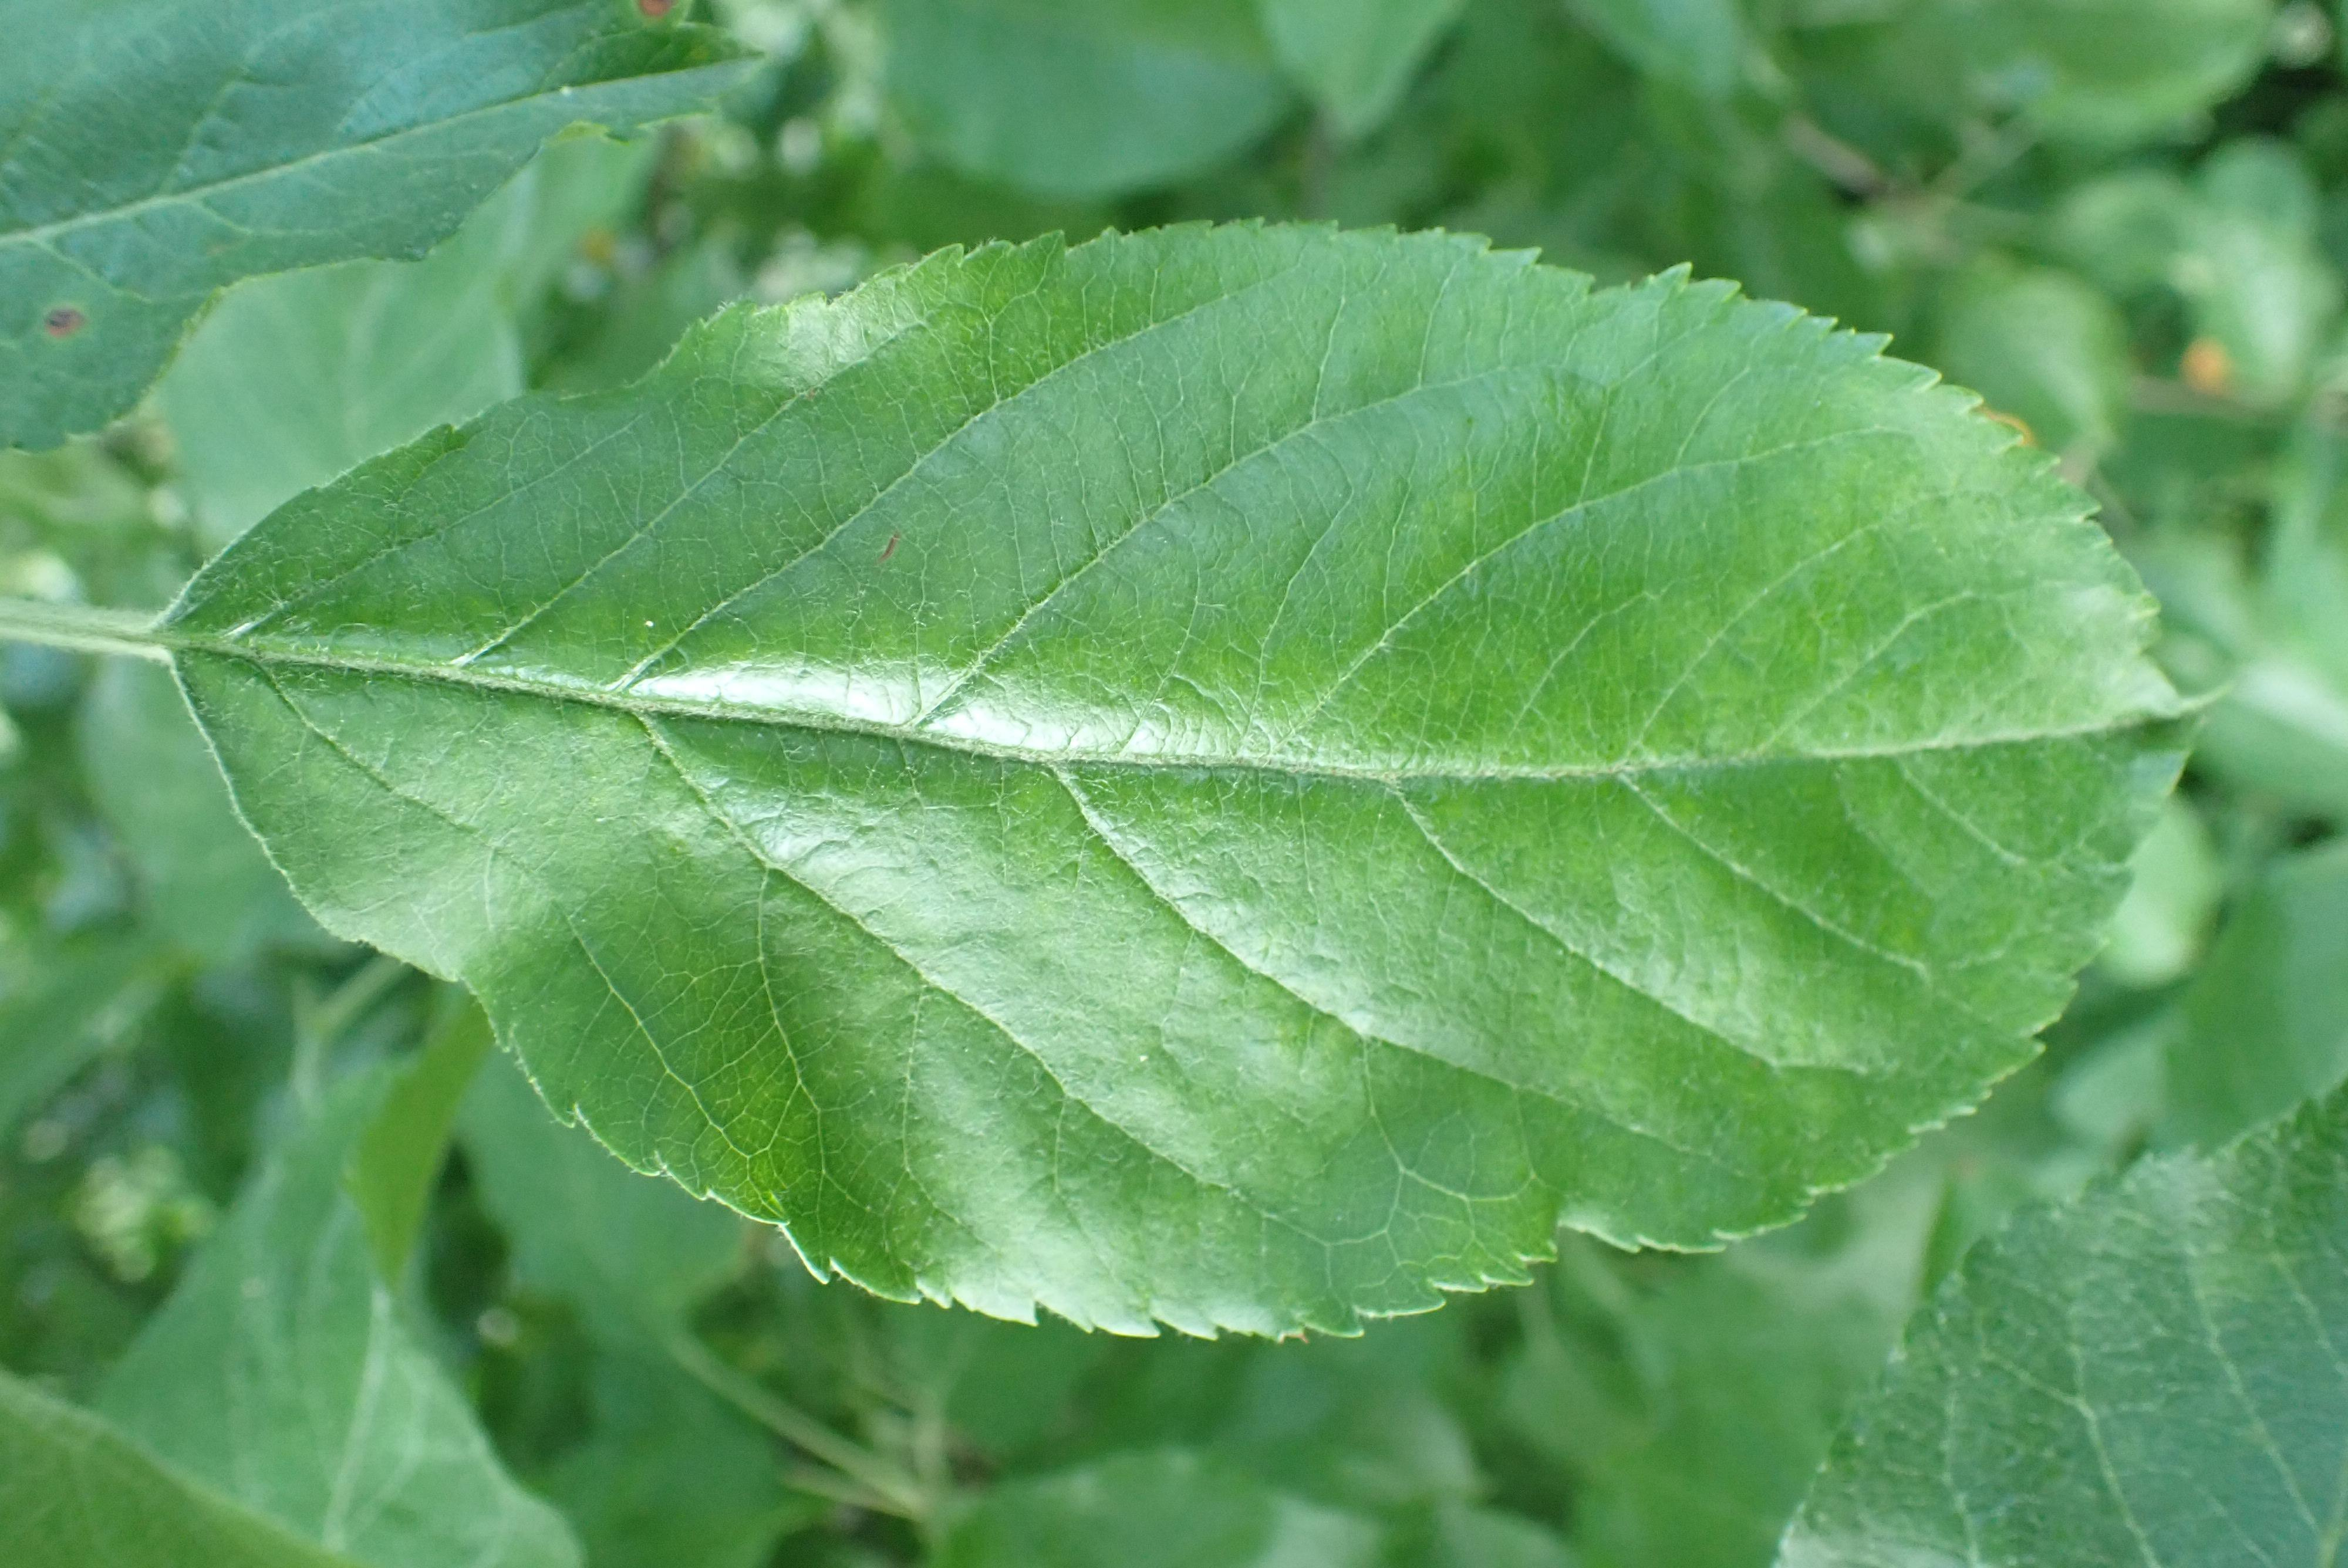

In [5]:
from PIL import Image
import IPython.display as display

image_path = 'Dataset/Train/Train/Healthy/8ce77048e12f3dd4.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

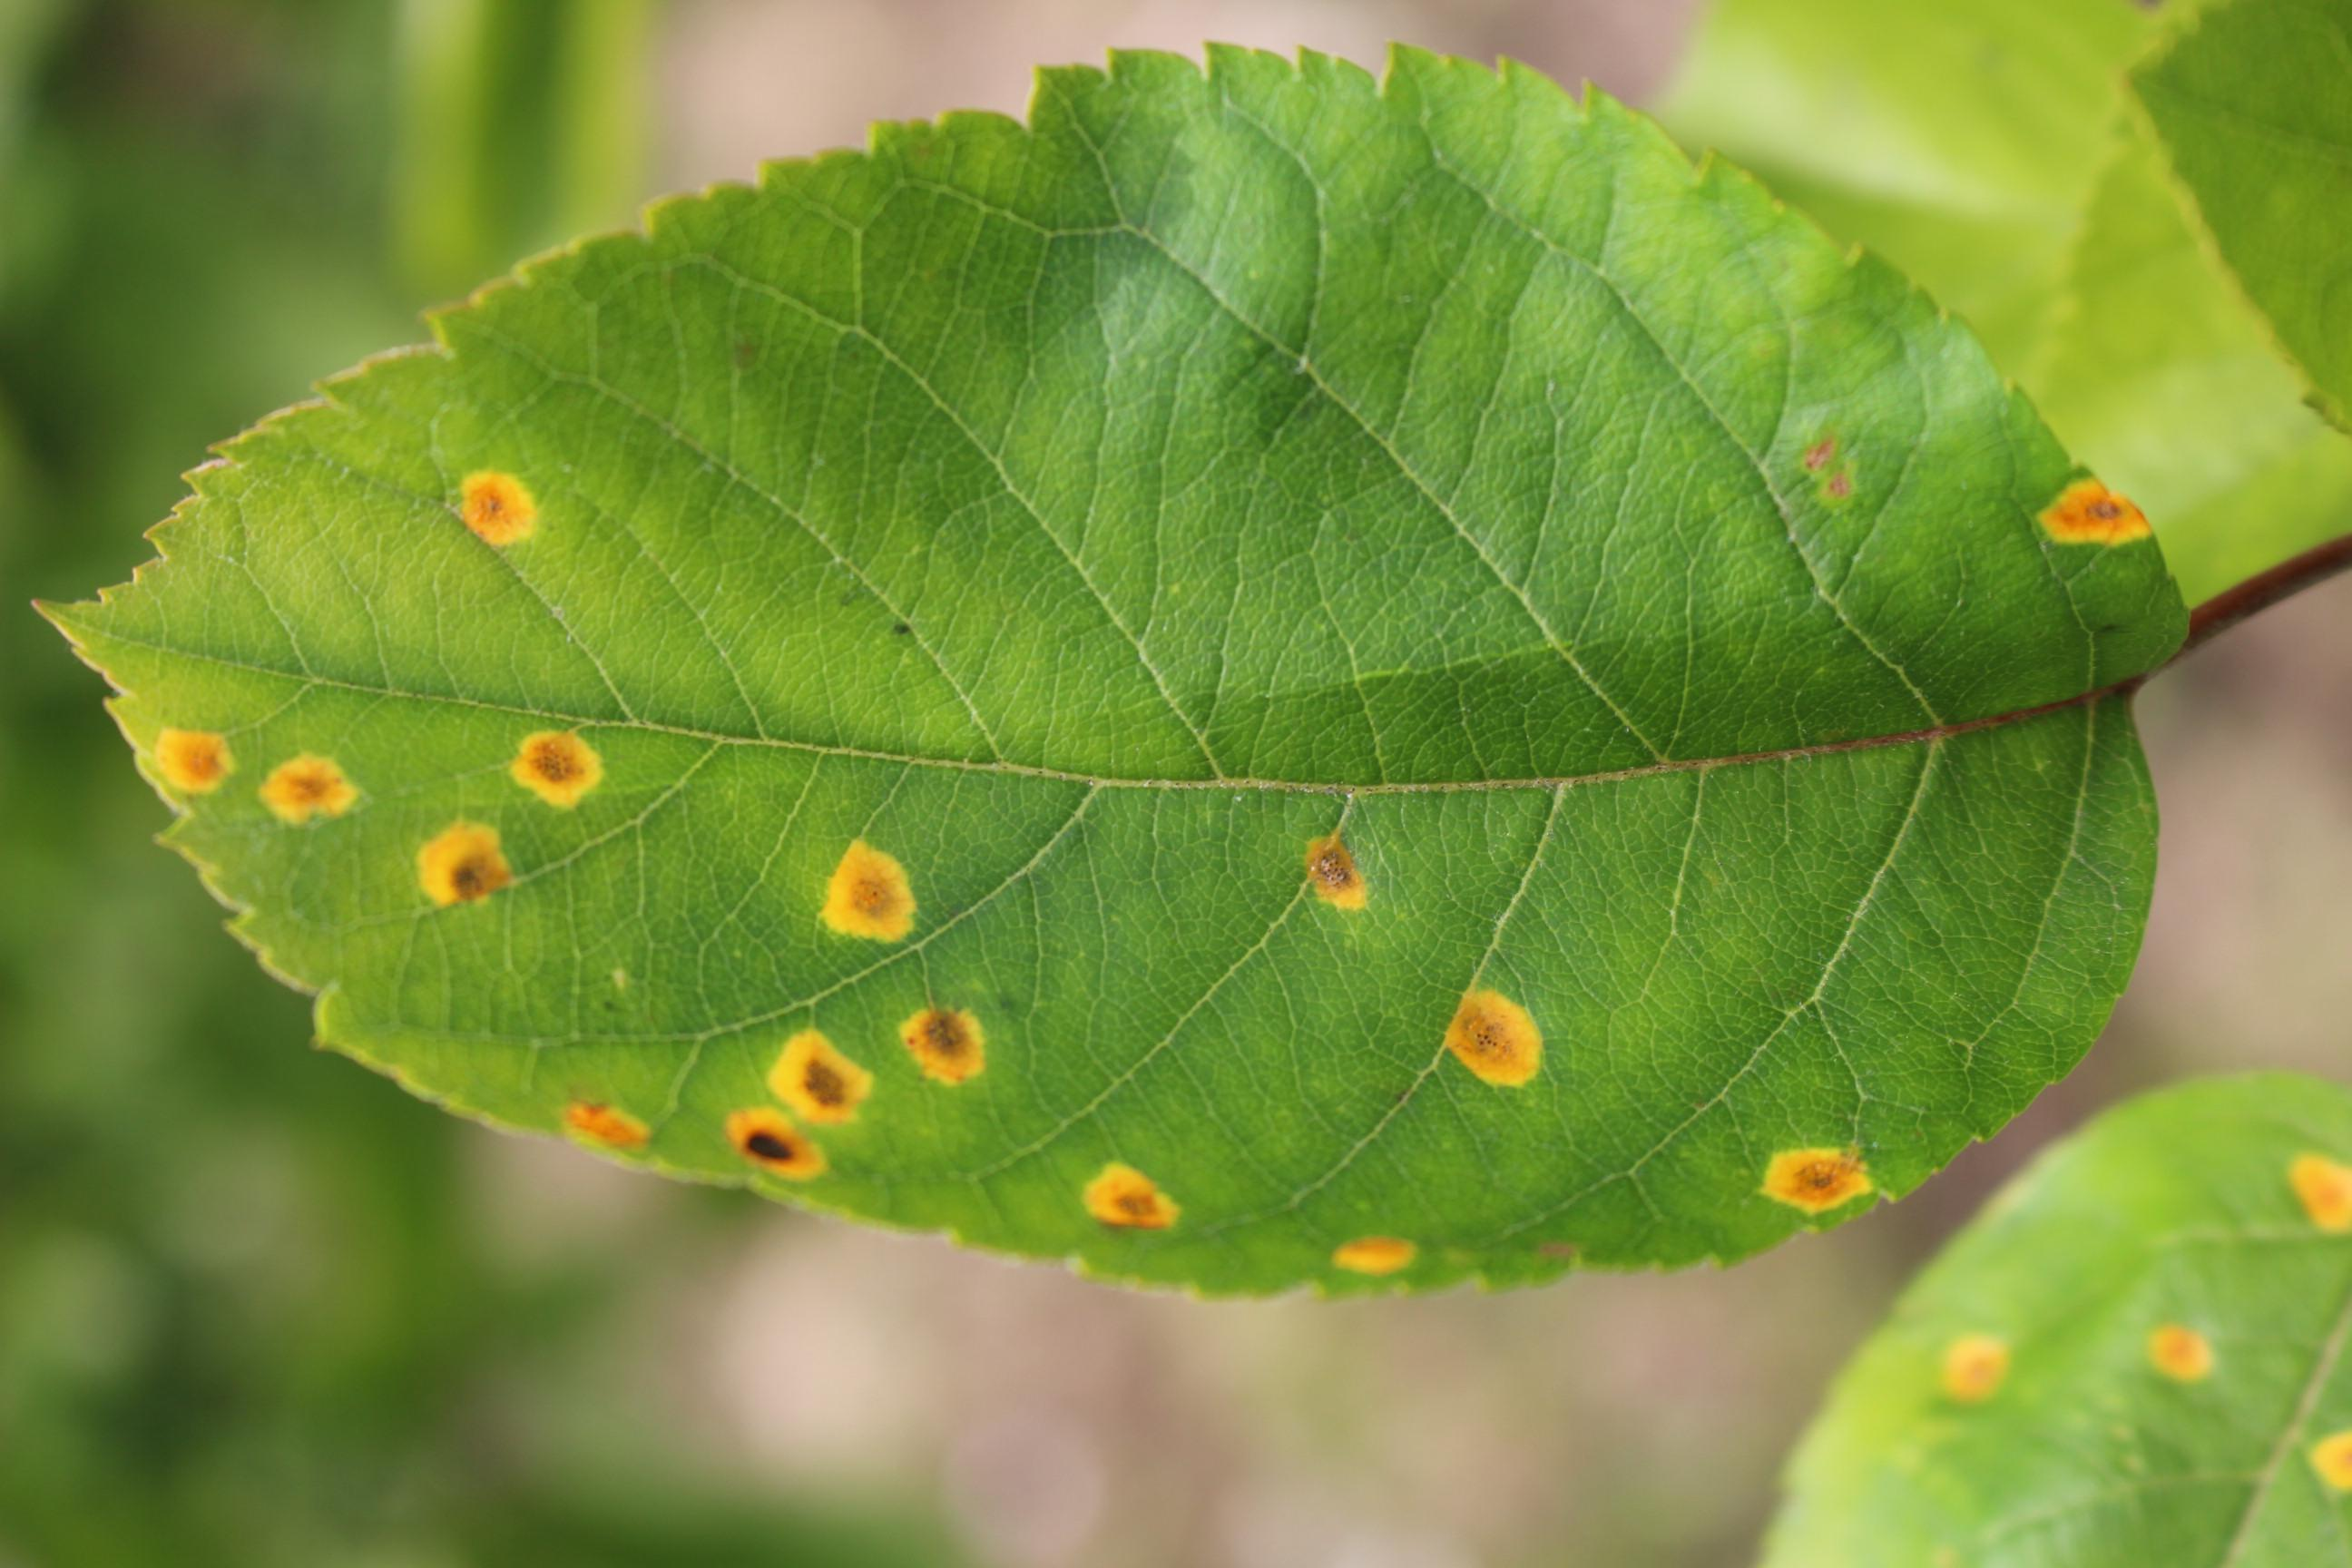

In [6]:
image_path = 'Dataset/Train/Train/Rust/80f09587dfc7988e.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 33111 images belonging to 41 classes.
Found 8339 images belonging to 41 classes.


In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

# Specify paths
train_dir = r'C:\sem5\videoimage\project\dataset\train'
test_dir = r'C:\sem5\videoimage\project\dataset\test'

# Image Data Generators for train and test data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load train and test data with a progress bar
print("Loading training data...")
train_generator = tqdm(train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'
), total=len(os.listdir(train_dir)))

print("Loading test data...")
test_generator = tqdm(test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
), total=len(os.listdir(test_dir)))

# Build CNN model
model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Progress bar for model training
class TQDMCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        tqdm.write(f'Epoch {epoch+1} ended with loss: {logs["loss"]:.4f}, accuracy: {logs["accuracy"]:.4f}, val_loss: {logs["val_loss"]:.4f}, val_accuracy: {logs["val_accuracy"]:.4f}')

# Train the model with progress bar for epochs
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    callbacks=[early_stop, checkpoint, TQDMCallback()],
    verbose=0  # Disable built-in verbose to use tqdm
)

# Load the best model after training (using .keras format)
model = load_model('best_model.keras')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Loading training data...
Found 33111 images belonging to 41 classes.


  0%|          | 0/41 [00:00<?, ?it/s]

Loading test data...
Found 8339 images belonging to 41 classes.


AttributeError: 'tqdm' object has no attribute 'num_classes'

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/25


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 186624, but received input with shape (None, 82944)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 150, 150, 3), dtype=float32)
  • training=True
  • mask=None

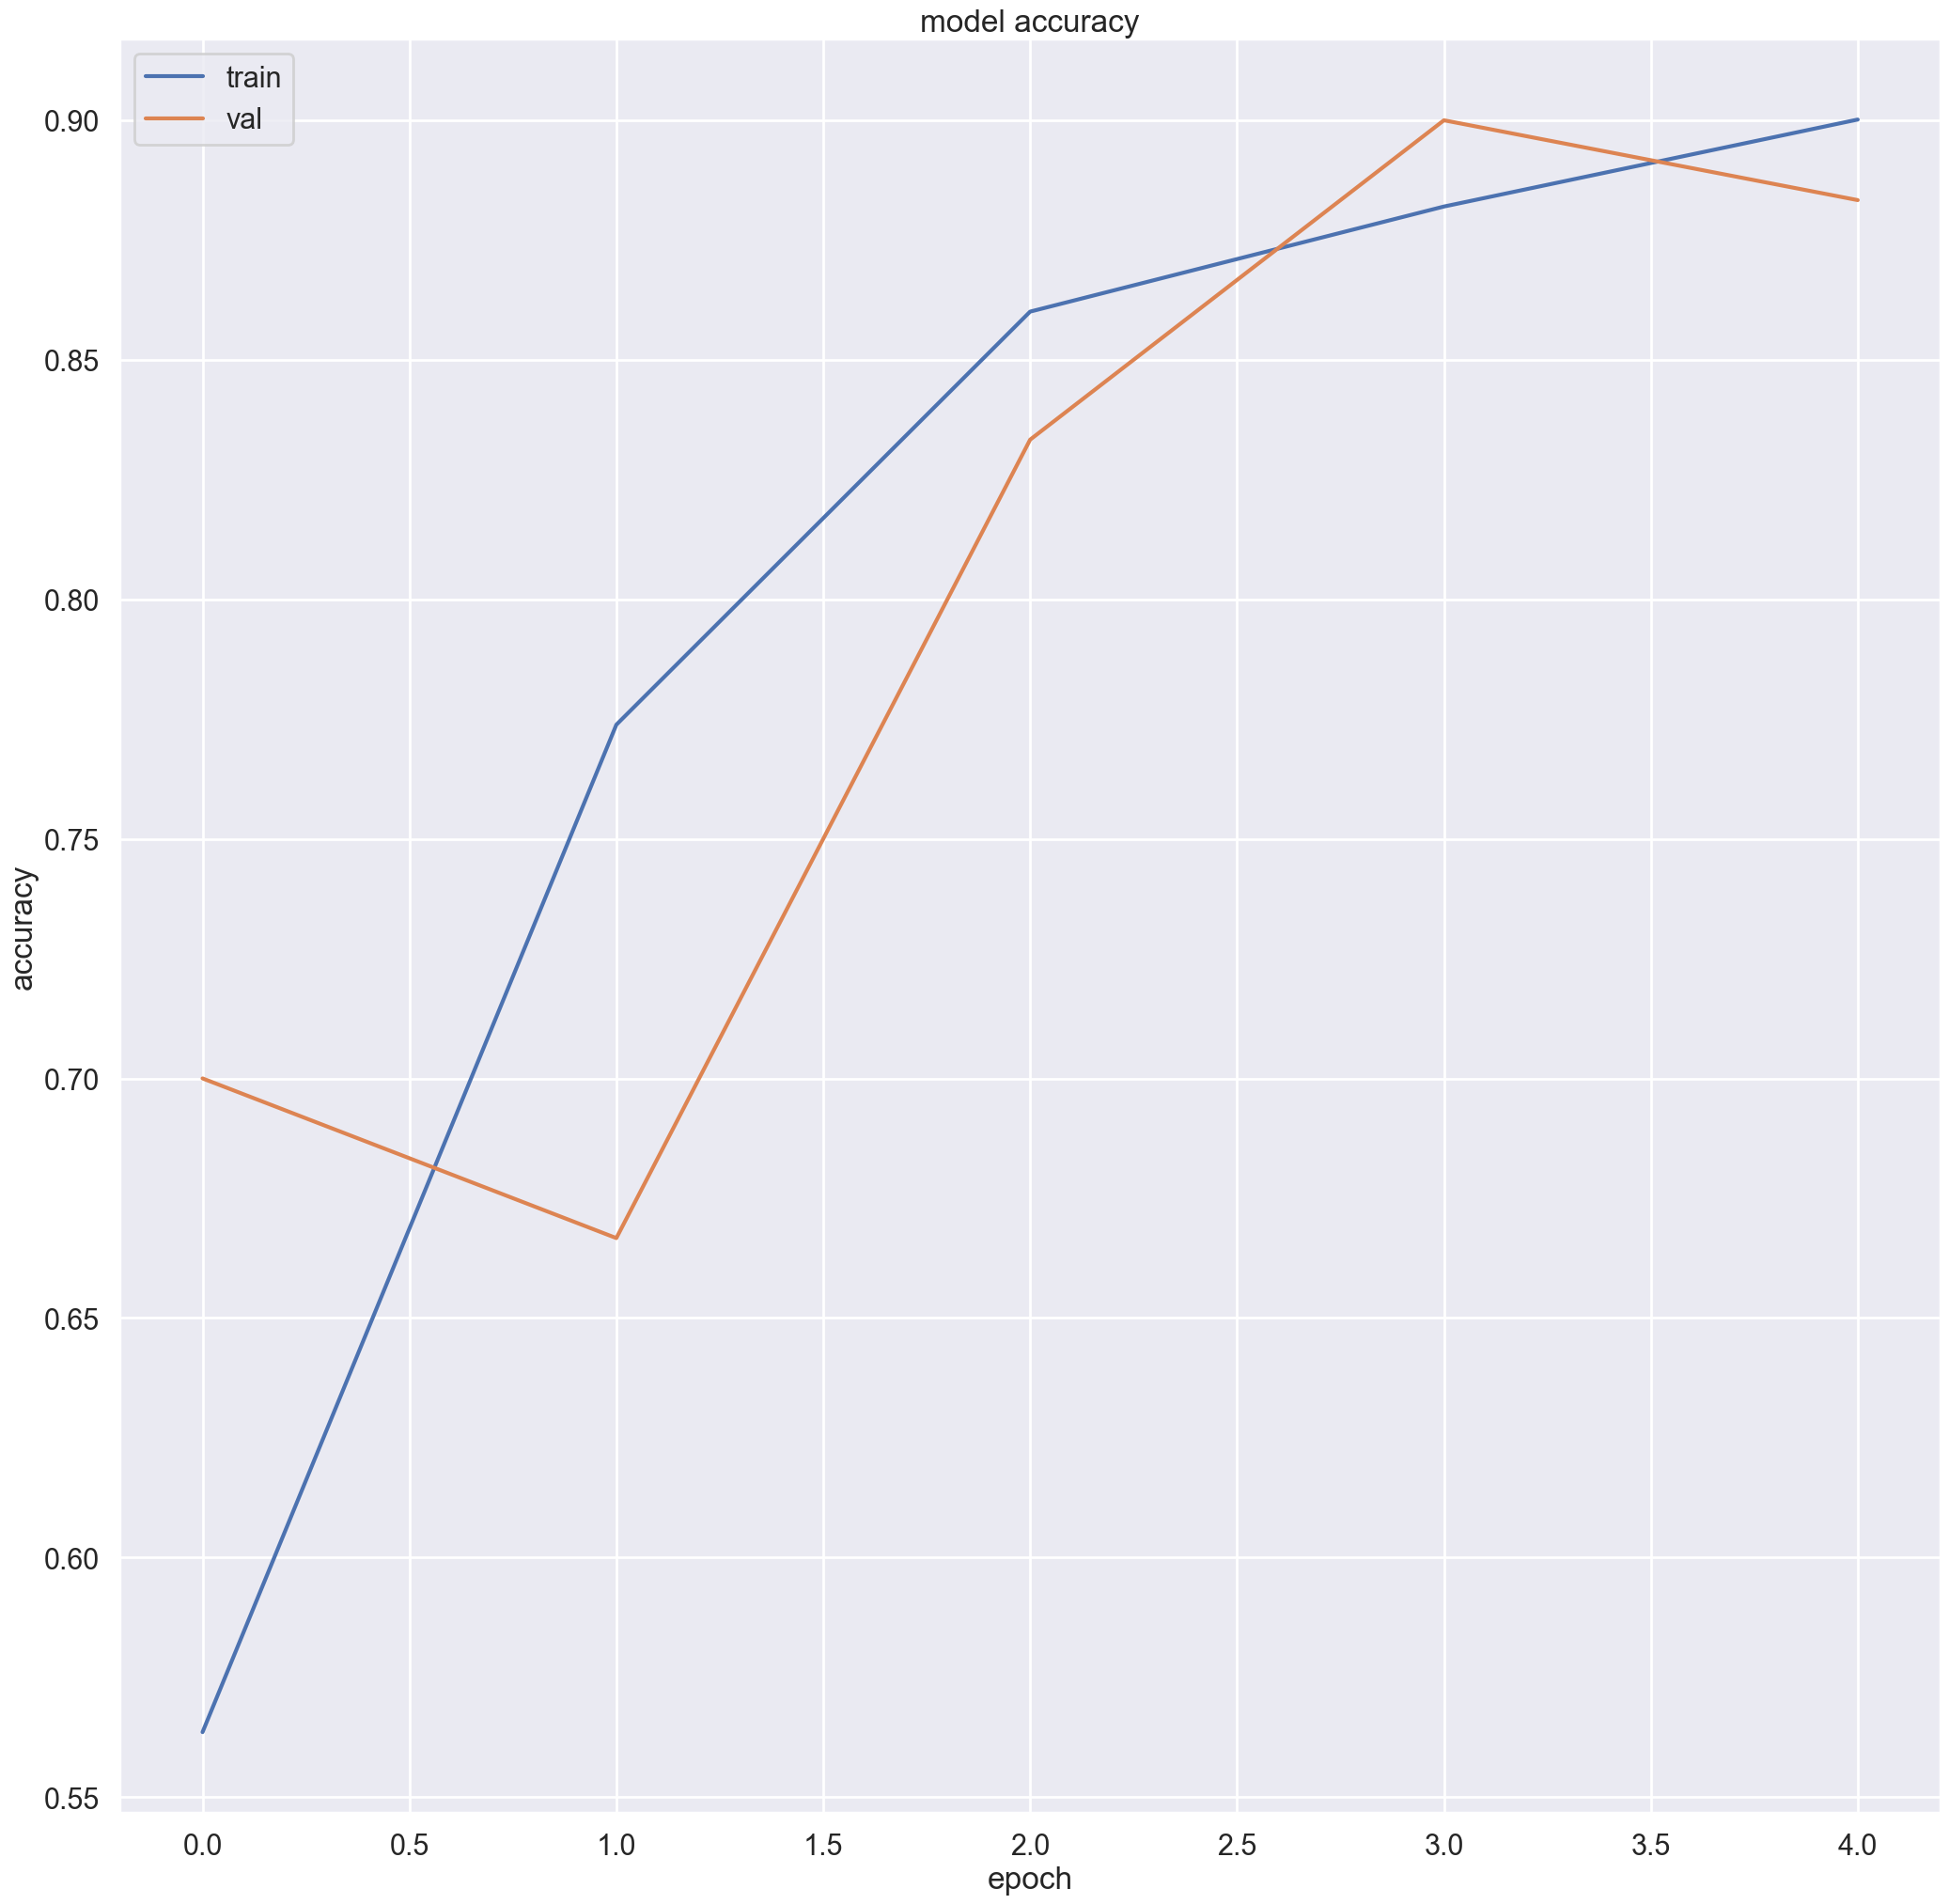

In [14]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model.save("model.h5")

In [16]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('Dataset/Test/Test/Rust/82f49a4a7b9585f1.jpg')

In [17]:
predictions = model.predict(x)
predictions[0]

array([2.5705326e-01, 2.5312374e-05, 7.4292141e-01], dtype=float32)

In [18]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [19]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
